In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.layers import fully_connected, xavier_initializer

In [2]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [426]:
batch_size = 128
n_epoches = 185
z_dim = 100
dim = 128
ran = 1
n_batches = int(mnist.train.images.shape[0]/batch_size)
mnist.train.images.shape[1]

784

In [448]:
max(mnist.train.images[0]), min(mnist.train.images[0])

(0.9960785, 0.0)

In [427]:
tf.reset_default_graph()

In [428]:
z = tf.placeholder(dtype=tf.float32, shape = [None, z_dim])
x = tf.placeholder(dtype=tf.float32, shape = [None, 784])

In [429]:
#generator variable
w_g = {'1':tf.get_variable(name='w_g_1', shape=[z_dim,dim], initializer=xavier_initializer()),
       '2':tf.get_variable(name='w_g_2', shape=[dim,784], initializer=xavier_initializer())}
b_g = {'1':tf.Variable(tf.zeros(shape=[dim])),
       '2':tf.Variable(tf.zeros(shape=[784]))}
g_var = [w_g['1'],w_g['2'],b_g['1'],b_g['2']]

#discriminator variable
w_d = {'1':tf.get_variable(name='w_d_1', shape=[784,dim], initializer=xavier_initializer()),
       '2':tf.get_variable(name='w_d_2', shape=[dim,1], initializer=xavier_initializer())}
b_d = {'1':tf.Variable(tf.zeros(shape=[dim])),
       '2':tf.Variable(tf.zeros(shape=[1]))}
d_var = [w_d['1'],w_d['2'],b_d['1'],b_d['2']]

In [430]:
#G(Z)
gz_1 = tf.nn.relu(tf.matmul(z, w_g['1']) + b_g['1'])
gz_out = tf.nn.sigmoid(tf.matmul(gz_1, w_g['2']) + b_g['2']) #각각을 0~1까지 만들어서 확률분포 만들어주기 (이때 0에 대하여 대칭하게 해야함)

#D(G(Z))
dgz_1 = tf.nn.relu(tf.matmul(gz_out, w_d['1']) + b_d['1'])
dgz_out = tf.matmul(dgz_1, w_d['2']) + b_d['2']

#D(X)
dx_1 = tf.nn.relu(tf.matmul(x, w_d['1']) + b_d['1'])
dx_out = tf.matmul(dx_1, w_d['2']) + b_d['2']

In [431]:
# min log(1 - D(G(Z))) => max D(G(Z))
g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dgz_out, labels=tf.ones_like(dgz_out)))

# max log(D(X)) + log(1-D(G(Z)))
d_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dx_out, labels=tf.ones_like(dx_out))) + tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dgz_out, labels=tf.zeros_like(dgz_out)))

In [432]:
adam = tf.train.AdamOptimizer()

In [433]:
train_op_g = adam.minimize(g_loss, var_list=g_var)
train_op_d = adam.minimize(d_loss, var_list=d_var)

In [439]:
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

In [440]:
a = 0
try:
    for i in range(n_epoches):
        for j in range(n_batches):
            batch_x, _ = mnist.train.next_batch(batch_size)
            sess.run(train_op_g, feed_dict={z:np.random.uniform(-ran,ran,[batch_size,z_dim])}) # z-score가 아니라 uniform하게 바꿔야 가운데에 안몰려서 다양한 숫자가 나옴
            a+=1
            if a % 3 == 0: # discriminator가 유리한 게임이므로 패널티 줌
                sess.run(train_op_d, feed_dict={x:batch_x, z:np.random.uniform(-ran,ran,[batch_size,z_dim])})
        print_g = sess.run(g_loss, feed_dict={z:np.random.uniform(-ran,ran,[batch_size,z_dim])})
        print_d = sess.run(d_loss, feed_dict={x:batch_x, z:np.random.uniform(-ran,ran,[batch_size,z_dim])})
        print('g_loss = '+str(print_g))
        print('d_loss = '+str(print_d))
except KeyboardInterrupt:
    print('Stop Iterations')

g_loss = 4.47182
d_loss = 0.09243876
g_loss = 3.6781826
d_loss = 0.40236282
g_loss = 5.0750446
d_loss = 0.16415465
g_loss = 5.5071955
d_loss = 0.07168079
g_loss = 3.1691532
d_loss = 0.33424863
g_loss = 5.981842
d_loss = 0.12845193
g_loss = 3.8860393
d_loss = 0.3248862
g_loss = 4.0833144
d_loss = 0.16773528
g_loss = 2.861344
d_loss = 0.18499647
g_loss = 4.3187637
d_loss = 0.24532594
g_loss = 3.576695
d_loss = 0.31005797
g_loss = 3.4854114
d_loss = 0.28403136
g_loss = 4.226747
d_loss = 0.47687727
g_loss = 3.7470481
d_loss = 0.24333724
g_loss = 4.995812
d_loss = 0.36618868
g_loss = 4.729177
d_loss = 0.2747685
g_loss = 3.2526588
d_loss = 0.27282342
g_loss = 3.4203215
d_loss = 0.24758786
g_loss = 2.9913468
d_loss = 0.33383238
g_loss = 3.6107345
d_loss = 0.23654573
g_loss = 4.98413
d_loss = 0.4107684
g_loss = 3.948216
d_loss = 0.522502
g_loss = 3.7712708
d_loss = 0.32859206
g_loss = 3.4978628
d_loss = 0.3792832
g_loss = 3.9823098
d_loss = 0.3445667
g_loss = 3.956569
d_loss = 0.28934693
g_los

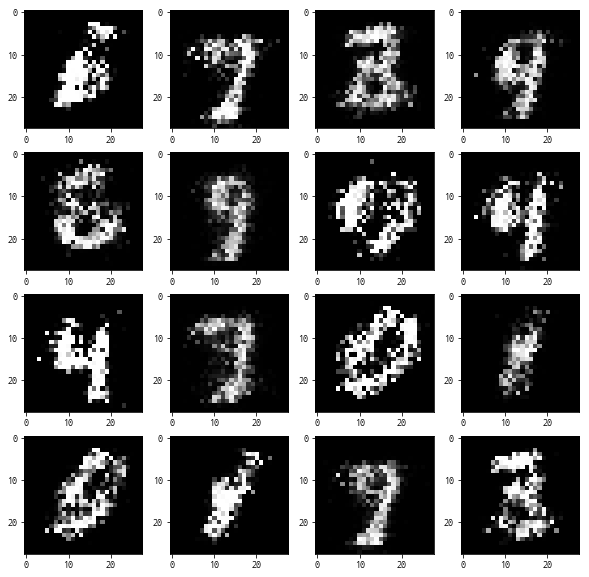

In [444]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
#     plt.imshow(batch_x[i].reshape(28,28), cmap='gray')
    plt.imshow(sess.run(gz_out, feed_dict={z:np.random.uniform(-ran,ran,[batch_size,z_dim])})[i].reshape(28,28), cmap='gray')

In [450]:
batch_x.shape

(128, 784)

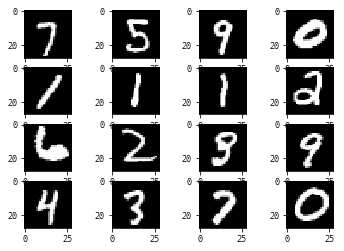

In [451]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(batch_x[i].reshape(28,28), cmap='gray')